# Chapter 4 - Programming Exercises

### [Link](https://runestone.academy/runestone/books/published/pythonds3/BasicDS/Exercises.html)

### 1. Modify the infix-to-postfix algorithm so that it can handle errors.

We have to see what are errors in the context of this algorithm. It turns out this list can present some common errors:
* The number of open parentheses must equal the number of closed parentheses.
* The token is something else than the ones accepted for the function (`"ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789()+-/*"`).

In [1]:
from pythonds3.basic import Stack

def infix_to_postfix(infix_expr):
    if infix_expr.count("(") != infix_expr.count(")"):
        print(f"Error! Closed parentheses (n = {infix_expr.count('(')}) don't match open parentheses (n = {infix_expr.count(')')})!")
        return 
    
    prec = {}
    prec["*"] = 3
    prec["/"] = 3
    prec["+"] = 2
    prec["-"] = 2
    prec["("] = 1
    op_stack = Stack()
    postfix_list = []
    token_list = infix_expr.split()

    for token in token_list:
        if token not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789()+-/*":
            print(f"Error, token {token} not recognized!")
        elif token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" or token in "0123456789":
            postfix_list.append(token)
        elif token == "(":
            op_stack.push(token)
        elif token == ")":
            top_token = op_stack.pop()
            while top_token != "(":
                postfix_list.append(top_token)
                top_token = op_stack.pop()
        else:
            while (not op_stack.is_empty()) and (prec[op_stack.peek()] >= prec[token]):
                postfix_list.append(op_stack.pop())
            op_stack.push(token)

    while not op_stack.is_empty():
        postfix_list.append(op_stack.pop())

    return " ".join(postfix_list)

### 2. Modify the postfix evaluation algorithm so that it can handle errors.

I can see that we have to add an exception when we are diving by zero. I decided to still return infinity.

In [2]:
import math

def postfix_eval(postfix_expr):
    operand_stack = Stack()
    token_list = postfix_expr.split()

    for token in token_list:
        if token in "0123456789":
            operand_stack.push(int(token))
        else:
            operand2 = operand_stack.pop()
            operand1 = operand_stack.pop()
            result = do_math(token, operand1, operand2)
            operand_stack.push(result)
    return operand_stack.pop()


def do_math(op, op1, op2):
    if op == "*":
        return op1 * op2
    elif op == "/":
        try:
            result = op1 / op2
        except ZeroDivisionError:
            print(f"Division by 0 will give an infinite number!")
            result = op1 * math.inf
        finally:
            return result
    elif op == "+":
        return op1 + op2
    elif op == "-":
        return op1 - op2
    elif op == "^":
        return op1 ** op2
    else:
        print(f"Not a valid operation ({op})! Returning NaN.")
        return math.nan

### 3. Implement a direct infix evaluator that combines the functionality of infix-to-postfix conversion and the postfix evaluation algorithm. Your evaluator should process infix tokens from left to right and use two stacks, one for operators and one for operands, to perform the evaluation.

Both the modules already defined can be chained to produce a direct infix evaluator, but since we are operating with numbers, we have to modify it so that only numbers are accepted. As bonus point, I will add, as asked during the chapter, the ** (power) operator.

In [9]:
def direct_infix_evaluator(infix_expr):
    if infix_expr.count("(") != infix_expr.count(")"):
        print(f"Error! Closed parentheses (n = {infix_expr.count('(')}) don't match open parentheses (n = {infix_expr.count(')')})!")
        return 
    
    prec = {}
    prec["*"] = 4
    prec["/"] = 4
    prec["+"] = 3
    prec["-"] = 3
    prec["^"] = 2
    prec["("] = 1
    op_stack = Stack()
    operand_stack = Stack()
    postfix_list = []
    token_list = infix_expr.replace("**", "^").split()

    for token in token_list:
        if (not token.isnumeric()) and (token not in "()+-/*^"):
            print(f"Error, token {token} not recognized!")
        elif token.isnumeric():
            postfix_list.append(token)
        elif token == "(":
            op_stack.push(token)
        elif token == ")":
            top_token = op_stack.pop()
            while top_token != "(":
                postfix_list.append(top_token)
                top_token = op_stack.pop()
        else:
            while (not op_stack.is_empty()) and (prec[op_stack.peek()] >= prec[token]):
                postfix_list.append(op_stack.pop())
            op_stack.push(token)

    while not op_stack.is_empty():
        postfix_list.append(op_stack.pop())

    postfix_expr = " ".join(postfix_list)
    token_list = postfix_expr.split()

    for token in token_list:
        if token in "0123456789":
            operand_stack.push(int(token))
        else:
            operand2 = operand_stack.pop()
            operand1 = operand_stack.pop()
            result = do_math(token, operand1, operand2)
            operand_stack.push(result)
            
    return operand_stack.pop()


Let's now run it with different expressions.

In [10]:
print(direct_infix_evaluator("5 * 3 ** ( 4 - 2 )"))
print(direct_infix_evaluator("( ( 3 + 2 ) * ( 6 * ( 1 - 5 ** 3 ) ) )"))

225
-1920


It seems it's working!

### 4. Turn your direct infix evaluator from the previous problem into a calculator.

In [11]:
def calc_simulation():
    expr = input("Enter an expression (q to quit): ")
    while expr != "q":
        print(f"Result is {direct_infix_evaluator(expr)}.")
        expr = input("Enter another expression (q to quit): ")
    print(f"See ya!")
        

Let's test it.

In [13]:
calc_simulation()

Result is 4.
Result is 8.
Result is 32.
See ya!


### 5. Implement the `Queue` ADT, using a list such that the rear of the queue is at the end of the list.

In [14]:
class QueueRear:
    def __init__(self):
        self._items = []

    def enqueue(self, item):
        self._items.append(item)

    def dequeue(self):
        self._items.pop(0)

### 6. Design and implement an experiment to do benchmark comparisons of the two queue implementations. What can you learn from such an experiment?

It's easy to convince yourself that in this implementation, the enqueue operation becomes $O(1)$ while the dequeue operation becomes $O(n)$.

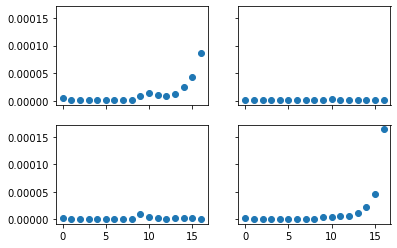

In [32]:
import time

from pythonds3.basic import Queue

import numpy as np 
import matplotlib.pyplot as plt

im1_times_enq = []
im2_times_enq = []
im1_times_deq = []
im2_times_deq = []

im1 = Queue()
im2 = QueueRear()

BASE = 2
MAX_EXP = 16

sizes = [BASE ** i for i in range(MAX_EXP + 1)]

for size in sizes:
    for n in np.arange(size):
        im1.enqueue(n)
        im2.enqueue(n)

    es1 = time.time()
    im1.enqueue(n + 1)
    ee1 = time.time()
    im1_times_enq.append(ee1 - es1)

    es2 = time.time()
    im2.enqueue(n + 1)
    ee2 = time.time()
    im2_times_enq.append(ee2 - es2)
    
    ds1 = time.time()
    i = im1.dequeue()
    de1 = time.time()
    im1_times_deq.append(de1 - ds1)

    ds2 = time.time()
    i = im2.dequeue()
    de2 = time.time()
    im2_times_deq.append(de2 - ds2)

im1_times_enq = np.array(im1_times_enq)
im2_times_enq = np.array(im2_times_enq)
im1_times_deq = np.array(im1_times_deq)
im2_times_deq = np.array(im2_times_deq)

x = np.arange(MAX_EXP + 1)
ys = [im1_times_enq, im2_times_enq, im1_times_deq, im2_times_deq]

fig, axs = plt.subplots(2, 2, sharex="all", sharey="all")

axs[0, 0].scatter(x, ys[0])
axs[0, 1].scatter(x, ys[1])
axs[1, 0].scatter(x, ys[2])
axs[1, 1].scatter(x, ys[3])

We see what we stated at the beginning: for `enqueue()` the first implementation is of linear complexity while `dequeue()` is constant. For the second implementation we have the opposite facts as we switched the implementation.